## Module 5

In this assignment, you are going to work on Histograms and Scatterplots.

We have preprocessed the data as "df" for you. 

Follow the instructions and finish the rest part.

In [2]:
%%capture
###########################################################
### EXECUTE THIS CELL BEFORE YOU TO TEST YOUR SOLUTIONS ###
###########################################################
import imp, os, sys
sol = imp.load_compiled("solutions", "./solutions.py")
sol.get_solutions("imdb.xlsx")
from nose.tools import assert_equal
from pandas.util.testing import assert_frame_equal, assert_series_equal

In [3]:
# Loading the data
import pandas as pd
import numpy as np

xls = pd.ExcelFile('imdb.xlsx')
df = xls.parse('imdb')
df_directors = xls.parse('directors')
df_countries = xls.parse('countries')

df = pd.merge(left=df, right=df_countries, 
              how='inner', left_on='country_id', 
              right_on='id')

df = pd.merge(left=df, right=df_directors, 
              how='inner', left_on='director_id', 
              right_on='id')

print("Finished.")

Finished.


In [4]:
"""Q1: 
Is how much a movie makes indicative of how good it is?
Make a simple scatter plot comparing gross to imdb_score for movies during or after 2000 (title_year >= 2000) and before 2000 (title_year < 2000).
It may be useful to scale the x axis demarking gross. (Hint: Divide the gross amount by 1,000,000.)
Remember to put a legend indicating which color corresponds to which years.
What is your verdict?

Save your plot in a variable called plt1, and your dataframes in variables called df_after_2000 and df_before_2000
"""

import matplotlib.pyplot as plt1

# your code here
df.head()


,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
0,The Shawshank Redemption,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
1,The Green Mile,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
2,The Godfather,33,1,R,1972,9.2,134821952,175,1,USA,33,Francis Ford Coppola
3,The Godfather: Part II,33,1,R,1974,9.0,57300000,220,1,USA,33,Francis Ford Coppola
4,Apocalypse Now,33,1,R,1979,8.5,78800000,289,1,USA,33,Francis Ford Coppola


In [5]:
df_after_2000 = df[df["title_year"] >= 2000]
df_after_2000.head()
df_before_2000 = df[df["title_year"] < 2000]
df_before_2000.head()

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
0,The Shawshank Redemption,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
1,The Green Mile,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
2,The Godfather,33,1,R,1972,9.2,134821952,175,1,USA,33,Francis Ford Coppola
3,The Godfather: Part II,33,1,R,1974,9.0,57300000,220,1,USA,33,Francis Ford Coppola
4,Apocalypse Now,33,1,R,1979,8.5,78800000,289,1,USA,33,Francis Ford Coppola


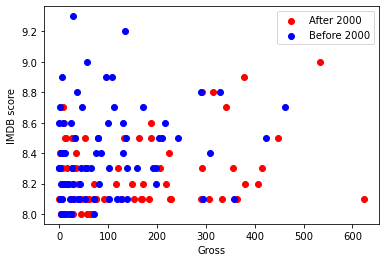

In [18]:
plt1.scatter(df_after_2000.gross/1000000, df_after_2000.imdb_score, c="r")
plt1.scatter(df_before_2000.gross/1000000, df_before_2000.imdb_score, c="b")
plt1.legend(["After 2000","Before 2000"])
plt1.xlabel("Gross")
plt1.ylabel("IMDB score")
plt1.show()

In [17]:
assert_frame_equal(df_before_2000, sol.df_before_2000)
assert_frame_equal(df_after_2000, sol.df_after_2000)
np.testing.assert_array_equal(plt1, sol.plt1)
print("Success!")

Success!


In [21]:
"""Q2: 
Using numpy and pyplot, make an overlapping histogram that shows the score distribution vs. count of R-Rated movies and PG-13 ones.
Describe your plot. 

Save your plot in a variable called plt2, and your dataframes in variables called df_R and df_PG13
"""

import matplotlib.pyplot as plt2

# your code here

df_R = df[df["content_rating"] == "R"]
df_R.head()
# plt2.show() 

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
0,The Shawshank Redemption,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
1,The Green Mile,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
2,The Godfather,33,1,R,1972,9.2,134821952,175,1,USA,33,Francis Ford Coppola
3,The Godfather: Part II,33,1,R,1974,9.0,57300000,220,1,USA,33,Francis Ford Coppola
4,Apocalypse Now,33,1,R,1979,8.5,78800000,289,1,USA,33,Francis Ford Coppola


In [32]:
df_PG13 = df[df["content_rating"] == "PG-13"]
df_PG13.head()

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
5,The Dark Knight,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan
6,Inception,16,1,PG-13,2010,8.8,292568851,148,1,USA,16,Christopher Nolan
7,Interstellar,16,1,PG-13,2014,8.6,187991439,169,1,USA,16,Christopher Nolan
9,The Prestige,16,1,PG-13,2006,8.5,53082743,130,1,USA,16,Christopher Nolan
10,The Dark Knight Rises,16,1,PG-13,2012,8.5,448130642,164,1,USA,16,Christopher Nolan


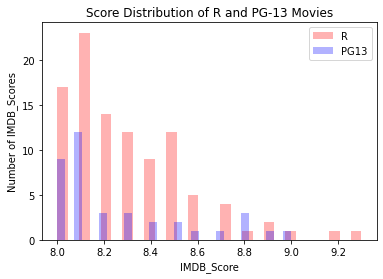

In [59]:
plt2.hist(
    df_R.imdb_score,
    alpha = 0.3,
    color = "red",
    bins = 28,
    label = "R"
)
plt2.hist(
    df_PG13.imdb_score,
    alpha = 0.3,
    color = "blue",
    bins = 28,
    label = "PG13"
)
plt2.xlabel("IMDB_Score")
plt2.ylabel("Number of IMDB_Scores")
plt2.legend(loc = "best")
plt2.title("Score Distribution of R and PG-13 Movies")
plt2.show()

In [53]:
assert_frame_equal(df_R, sol.df_R)
assert_frame_equal(df_PG13, sol.df_PG13)
np.testing.assert_array_equal(plt2, sol.plt2)
print("Success!")

Success!
